# Tubes IF2220 Probabilitas dan Statistika
Naufal Alexander Suryasumirat - 13519135

Naufal Yahya Kurnianto - 13519141

* [Soal1](#Soal1)
* [Soal2](#Soal2)
* [Soal3](#Soal3)
* [Soal4](#Soal4)
* [Soal5](#Soal5)
* [Soal6](#Soal6)

In [1]:
import pandas
import warnings
import matplotlib.pyplot
import numpy
import seaborn
import scipy
from scipy.stats import shapiro, norm, zscore, ttest_1samp, ttest_ind, norm, f
from statsmodels.stats.proportion import proportions_ztest

warnings.simplefilter(action = 'ignore', category=FutureWarning) # Menghilangkan warning untuk distplot

In [2]:
column_names = ["id", "Daerah", "SumbuUtama", "SumbuKecil", "Keunikan", "AreaBulatan", "Diameter", "KadarAir", "Keliling", "Bulatan", "Ransum", "Kelas"]
gandum = pandas.read_csv("./../test/Gandum.csv", header = None, names = column_names) # Membaca file
gandum  # Memperlihatkan Gandum.csv
        # Kolom 2 - 11 adalah kolom atribut (non-target), kolom 12 adalah target

,id,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum,Kelas
0,1,5781,128.288875,58.470846,0.890095,5954,85.793926,0.674090,316.756,0.724041,2.194066,1
1,2,4176,109.348294,49.837688,0.890098,4277,72.918093,0.596231,260.346,0.774227,2.194088,1
2,3,4555,114.427991,52.151207,0.890105,4706,76.155145,0.776641,279.606,0.732159,2.194158,1
3,4,4141,108.701190,49.457349,0.890499,4236,72.611879,0.633180,260.478,0.766961,2.197877,1
4,5,5273,122.747868,55.757848,0.890876,5431,81.937733,0.669842,302.730,0.723031,2.201446,1
...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,5083,120.083450,54.821580,0.889709,5179,80.447975,0.534827,286.377,0.778850,2.190441,2
496,497,4432,112.367050,51.294914,0.889726,4550,75.119889,0.601194,270.823,0.759344,2.190608,2
497,498,5020,119.873742,54.718545,0.889740,5104,79.947874,0.528421,285.799,0.772311,2.190733,2
498,499,4035,107.311728,48.930802,0.889996,4150,71.676506,0.584698,258.503,0.758791,2.193132,2


### Soal1
1. Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data yang bersifat numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis. Boleh juga ditambahkan deskripsi lain.

In [3]:
# Soal 1
descGandum = gandum.drop(columns = ["id", "Kelas"]) # Drop kolom id dan Kelas
statistik = pandas.DataFrame() # Membuat DataFrame baru
statistik["Mean"] = descGandum.mean() # Mean
statistik["Median"] = descGandum.median() # Median

# Modus tiap kolom
mode = [] # Kolom "Modus"
for column in descGandum.columns:
    if (descGandum[column].mode().dropna().count() == gandum["id"].count()):
        mode.append("None") # Jika tidak terdapat modus (seluruh data unik)
        continue
    mode.append(descGandum[column].mode().astype(str).str.cat(sep = ', ')) # Modus tiap kolom

statistik["Modus"] = mode # Modus (diperlihatkan seluruh modus)
statistik["Std.Deviasi"] = descGandum.std() # Standar Deviasi
statistik["Variansi"] = descGandum.var() # Variansi
statistik["Range"] = descGandum.max() - descGandum.min() + 1 # Range
statistik["Maksimum"] = descGandum.max() # Maksimum
statistik["Minimum"] = descGandum.min() # Minimum
statistik["Q1"] = descGandum.quantile(.25) # Quartil pertama
statistik["Q3"] = descGandum.quantile(.75) # Quartil ketiga
statistik["IQR"] = statistik["Q3"] - statistik["Q1"] # Interquartile Range (IQR)
statistik["Skewness"] = descGandum.skew() # Skewness
statistik["Kurtosis"] = descGandum.kurtosis() # Kurtosis
statistik # Memperlihatkan DataFrame 'statistik'

,Mean,Median,Modus,Std.Deviasi,Variansi,Range,Maksimum,Minimum,Q1,Q3,IQR,Skewness,Kurtosis
Daerah,4801.246000,4735.000000,"3992, 4881, 5642, 6083",986.395491,9.729761e+05,4932.000000,7453.000000,2522.000000,4042.750000,5495.500000,1452.750000,0.238144,-0.434631
SumbuUtama,116.045171,115.405140,None,18.282626,3.342544e+02,154.795469,227.928583,74.133114,104.116098,129.046792,24.930694,0.761529,4.330534
SumbuKecil,53.715246,53.731199,None,4.071075,1.657365e+01,30.071182,68.977700,39.906517,51.193576,56.325158,5.131582,-0.010828,0.475568
Keunikan,0.878764,0.890045,None,0.036586,1.338528e-03,1.194085,0.914001,0.719916,0.863676,0.907578,0.043902,-1.623472,2.917256
AreaBulatan,4937.048000,4857.000000,"3802, 4913",1011.696255,1.023529e+06,5142.000000,7720.000000,2579.000000,4170.250000,5654.250000,1484.000000,0.257560,-0.409685
Diameter,77.771158,77.645277,"71.29356396, 78.83325579, 84.75622403, 88.0063...",8.056867,6.491311e+01,41.747172,97.413830,56.666658,71.745308,83.648598,11.903290,0.002725,-0.466455
KadarAir,0.648372,0.626117,"0.735849057, 0.824404762",0.094367,8.905149e-03,1.468972,0.878899,0.409927,0.572632,0.726633,0.154001,0.493661,-0.740326
Keliling,281.479722,280.045500,None,37.335402,1.393932e+03,292.822000,488.837000,197.015000,255.883000,306.062500,50.179500,0.733627,2.272685
Bulatan,0.761737,0.761288,None,0.061702,3.807194e-03,1.730158,0.904748,0.174590,0.731991,0.796361,0.064370,-3.599237,29.975096
Ransum,2.150915,2.193599,None,0.249767,6.238350e-02,2.024013,2.464809,1.440796,1.983939,2.381612,0.397673,-0.658188,-0.428656


##### Penjelasan
Kolom yang memiliki Modus None menandakan bahwa tiap elemen pada kolom tersebut unik, sehingga tidak memiliki modus yang dapat ditampilkan

### Soal2
2. Membuat Visualisasi plot distribusi, dalam bentuk histogram dan boxplot untuk setiap kolom numerik. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot tersebut.

#### Kolom "Daerah"

Penjelasan:

Dapat terlihat pada histogram plot kolom daerah, tabel tidak terdistribusi normal dan dari Box plot dapat terlihat tidak terdapat outlier untuk kolom "Daerah"

<AxesSubplot:ylabel='Frequency'>

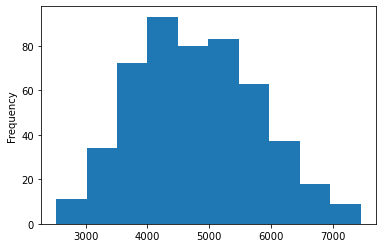

In [4]:
# Histogram Plot Kolom Daerah (Histogram)
gandum["Daerah"].plot(kind = 'hist')

<AxesSubplot:>

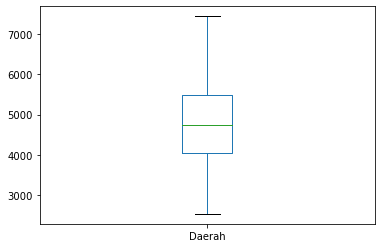

In [5]:
# Histogram Plot Kolom Daerah (Box)
gandum["Daerah"].plot(kind = 'box')

In [6]:
# Skew kolom "Daerah"
gandum["Daerah"].skew()

0.23814408738280812

In [7]:
# Kurtosis kolom "Daerah", normal = 0
gandum["Daerah"].kurtosis()

-0.4346305340273977

#### Kolom "Sumbu Utama"

Penjelasan:

Dapat terlihat pada histogram plot kolom sumbu utama, tabel tidak terdistribusi normal karena tidak tersebar secara merata dan dari Box plot dapat terlihat terdapat outlier yang melebihi batas atas dari box plot tersebut dengan nilai 220

<AxesSubplot:ylabel='Frequency'>

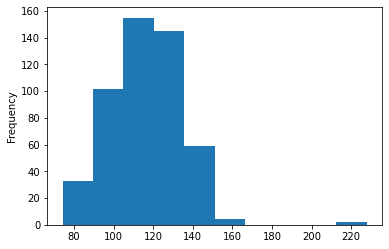

In [8]:
# Histogram Plot Kolom Sumbu Utama (Histogram)
gandum["SumbuUtama"].plot(kind = 'hist')

<AxesSubplot:>

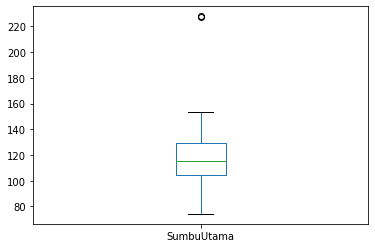

In [9]:
# Histogram Plot Kolom Sumbu Utama (Box)
gandum["SumbuUtama"].plot(kind = 'box')

In [10]:
# Skew kolom "Sumbu Utama"
gandum["SumbuUtama"].skew()

0.7615287378076652

In [11]:
# Kurtosis kolom "Sumbu Utama"
gandum["SumbuUtama"].kurtosis()

4.33053354843697

#### Kolom "Sumbu Kecil"

Penjelasan:

Dapat terlihat pada histogram plot kolom sumbu kecil, tabel terdistribusi secara normal karena terdistribusi secara merata dan dari Box plot dapat terlihat terdapat beberapa outlier yang melebihi batas atas dan terdapat juga yang kurang dari batas bawah

<AxesSubplot:ylabel='Frequency'>

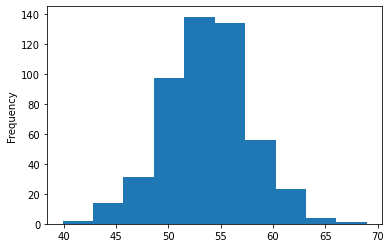

In [12]:
# Histogram Plot Kolom Sumbu Kecil (Histogram)
gandum["SumbuKecil"].plot(kind = 'hist')

<AxesSubplot:>

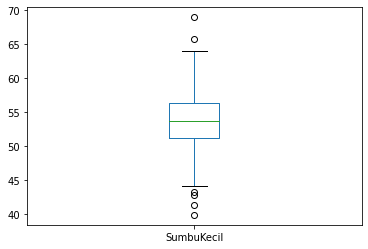

In [13]:
# Histogram Plot Kolom Sumbu Kecil (Box)
gandum["SumbuKecil"].plot(kind = 'box')

In [14]:
# Skew kolom "Sumbu Kecil"
gandum["SumbuKecil"].skew()

-0.010828051555611359

In [15]:
# Kurtosis kolom "Sumbu Kecil", normal = 0
gandum["SumbuKecil"].kurtosis()

0.475568450438137

#### Kolom "Keunikan"

Penjelasan:

Dapat terlihat pada histogram plot kolom keunikan, tabel tidak terdistribusi normal karena terlihat dengan jelas bahwa plot histogram skew negatif dan dari Box plot dapat terlihat terdapat beberapa outlier yang kurang dari batas bawah

<AxesSubplot:ylabel='Frequency'>

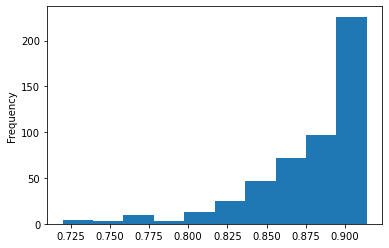

In [16]:
# Histogram Plot Kolom Keunikan (Histogram)
gandum["Keunikan"].plot(kind = 'hist')

<AxesSubplot:>

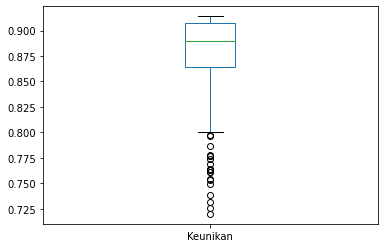

In [17]:
# Histogram Plot Kolom Keunikan (Box)
gandum["Keunikan"].plot(kind = 'box')

In [18]:
# Skew kolom "Keunikan"
gandum["Keunikan"].skew()

-1.6234718222806501

In [19]:
# Kurtosis kolom "Keunikan", normal = 0
gandum["Keunikan"].kurtosis()

2.917255925694391

#### Kolom "Area Bulatan"

Penjelasan:

Dapat terlihat pada histogram plot kolom area bulatan, tabel tidak terdistribusi normal karena terlihat tidak dan bentuknya tidak simetris seperti "bell curve" terdistribusi secara merata dan dari Box plot dapat terlihat tidak terdapat outlier pada pendistribusian data

<AxesSubplot:ylabel='Frequency'>

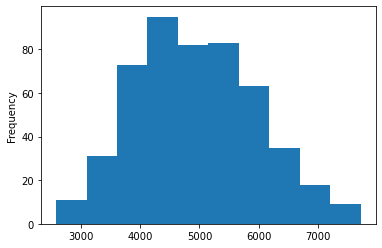

In [20]:
# Histogram Plot Kolom Area Bulatan (Histogram)
gandum["AreaBulatan"].plot(kind = 'hist')

<AxesSubplot:>

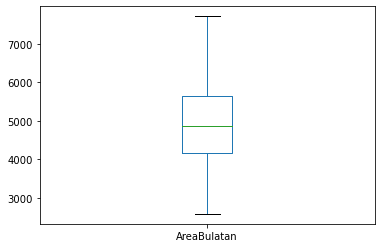

In [21]:
# Histogram Plot Kolom Area Bulatan (Box)
gandum["AreaBulatan"].plot(kind = 'box')

In [22]:
# Skew kolom "Area Bulatan"
gandum["AreaBulatan"].skew()

0.2575600053152032

In [23]:
# Kurtosis kolom "Area Bulatan", normal = 0
gandum["AreaBulatan"].kurtosis()

-0.40968492037366033

#### Kolom "Diameter"

Penjelasan:

Dapat terlihat pada histogram plot kolom diameter, tabel terlihat terdistribusi normal karena simestris dan berbentuk seperti "bell curve", sedangkan untuk box plot tidak terlihat terdapat outliers.

<AxesSubplot:ylabel='Frequency'>

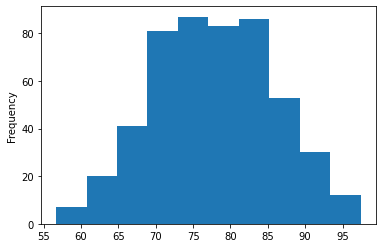

In [24]:
# Histogram Plot Kolom Diameter (Histogram)
gandum["Diameter"].plot(kind = 'hist')

<AxesSubplot:>

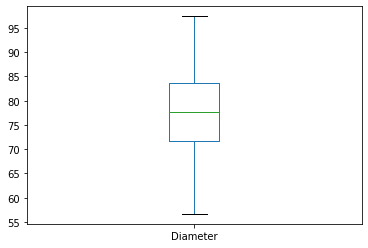

In [25]:
# Histogram Plot Kolom Diameter (Box)
gandum["Diameter"].plot(kind = 'box')

In [26]:
# Skew kolom "Diameter"
gandum["Diameter"].skew()

0.002724966865193717

In [27]:
# Kurtosis kolom "Diameter", normal = 0
gandum["Diameter"].kurtosis()

-0.46645451303121455

#### Kolom "Kadar Air"

Penjelasan:

Dapat terlihat pada histogram plot kolom kadar air, tabel tidak terdistribusi normal dan dari box plot tidak terlihat terdapat outliers.

<AxesSubplot:ylabel='Frequency'>

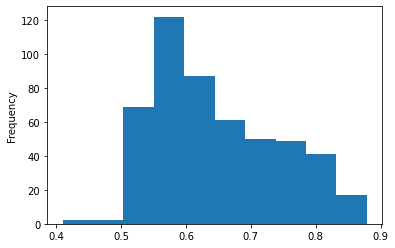

In [28]:
# Histogram Plot Kolom Kadar Air (Histogram)
gandum["KadarAir"].plot(kind = 'hist')

<AxesSubplot:>

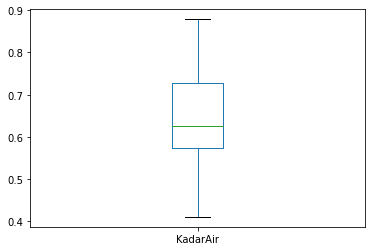

In [29]:
# Histogram Plot Kolom Kadar Air (Box)
gandum["KadarAir"].plot(kind = 'box')

In [30]:
# Skew kolom "Kadar Air"
gandum["KadarAir"].skew()

0.49366131797330265

In [31]:
# Kurtosis kolom "Kadar Air", normal = 0
gandum["KadarAir"].kurtosis()

-0.7403261705867821

#### Kolom "Keliling"

Penjelasan:

Dapat terlihat pada histogram plot kolom keliling, tabel tidak terdistribusi normal karena tidak berbentuk seperti bell curve dan skew positif dan dari box plot dapat terlihat terdapat beberapa outlier yang melebihi batas atas

<AxesSubplot:ylabel='Frequency'>

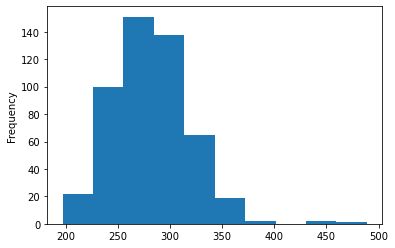

In [32]:
# Histogram Plot Kolom Keliling (Histogram)
gandum["Keliling"].plot(kind = 'hist')

<AxesSubplot:>

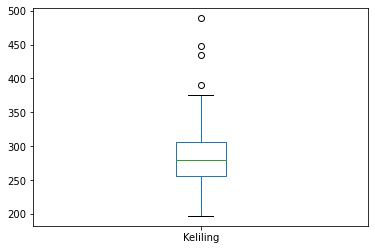

In [33]:
# Histogram Plot Kolom Keliling (Box)
gandum["Keliling"].plot(kind = 'box')

In [34]:
# Skew kolom "Keliling"
gandum["Keliling"].skew()

0.7336269072005543

In [35]:
# Kurtosis kolom "Keliling", normal = 0
gandum["Keliling"].kurtosis()

2.272684731245573

#### Kolom "Bulatan"

Penjelasan:

Dapat terlihat pada histogram plot kolom bulatan, tabel tidak terdistribusi normal karena terlihat skew negatif dan dari box plot dapat terlihat terdapat banyak outlier pada batas atas dan batas bawah

<AxesSubplot:ylabel='Frequency'>

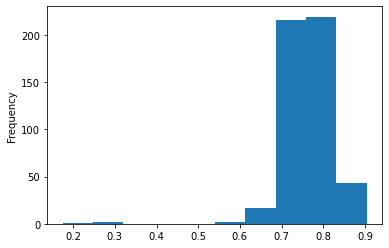

In [36]:
# Histogram Plot Kolom Bulatan (Histogram)
gandum["Bulatan"].plot(kind = 'hist')

<AxesSubplot:>

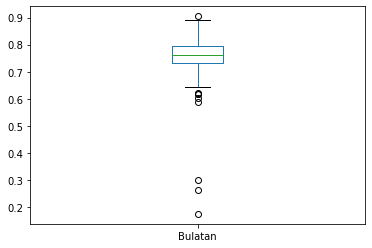

In [37]:
# Histogram Plot Kolom Bulatan (Box)
gandum["Bulatan"].plot(kind = 'box')

In [38]:
# Skew kolom "Bulatan"
gandum["Bulatan"].skew()

-3.599236766361642

In [39]:
# Kurtosis kolom "Bulatan", normal = 0
gandum["Bulatan"].kurtosis()

29.975095904630063

#### Kolom "Ransum"

Penjelasan:

Dapat terlihat pada histogram plot kolom ransum, tabel tidak terdistribusi normal karena skew negatif dan dari box plot tidak dapat terlihat terdapatnya outlier

<AxesSubplot:ylabel='Frequency'>

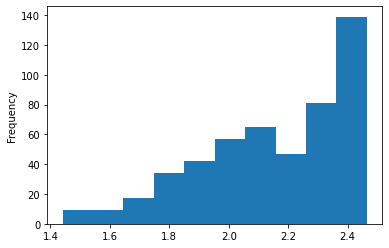

In [40]:
# Histogram Plot Kolom Ransum (Histogram)
gandum["Ransum"].plot(kind = 'hist')

<AxesSubplot:>

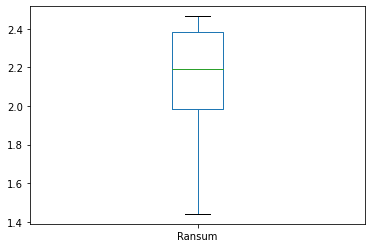

In [41]:
# Histogram Plot Kolom Ransum (Box)
gandum["Ransum"].plot(kind = 'box')

In [42]:
# Skew kolom "Ransum"
gandum["Ransum"].skew()

-0.6581880925333655

In [43]:
# Kurtosis kolom "Ransum", normal = 0
gandum["Ransum"].kurtosis()

-0.4286557930626147

### Soal3
3. Menentukan setiap kolom numerik berdistribusi normal atau tidak. Gunakan normality test yang dikaitkan dengan histogram plot.


In [44]:
# Normality Test Function
def normality_test(df):
    daerah_stat, p = shapiro(df)
    alpha = 0.05
    print("p-valuenya adalah", end=" ")
    if (p > alpha):
        print(str(p), ">", str(alpha) + ". Maka dari itu, sample berdistribusi normal")
    else:
        print(str(p), "<", str(alpha) + ". Maka dari itu, sample tidak berdistribusi normal")

#### Hasil Tes Distribusi Normal "Daerah"
Penjelasan: Seperti yang terlihat di bawah, distribusi kolom Daerah terlihat seperti bell curve namun setelah digunakan normality test, disimpulkan bahwa data tidak terdistribusi secara normal

p-valuenya adalah 0.003270698245614767 < 0.05. Maka dari itu, sample tidak berdistribusi normal


<AxesSubplot:xlabel='Daerah', ylabel='Density'>

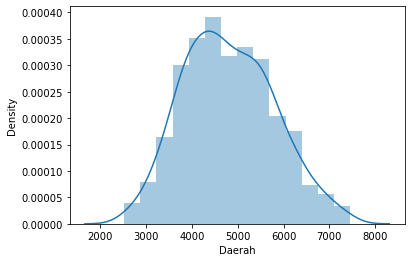

In [45]:
normality_test(gandum["Daerah"])
seaborn.distplot(gandum["Daerah"])

#### Hasil Tes Distribusi Normal "SumbuUtama"
Penjelasan: Seperti yang terlihat dari hasil plot dibawah, distribusi kolom Sumbu Utama tidak terlihat seperti bell curve dan hasil dari normality test tidak menunjukkan data terdistribusi secara normal, sehingga dapat disimpulkan bahwa data dalam kolom Sumbu Utama tidak terdistribusi secara normal

p-valuenya adalah 9.236201213569384e-12 < 0.05. Maka dari itu, sample tidak berdistribusi normal


<AxesSubplot:xlabel='SumbuUtama', ylabel='Density'>

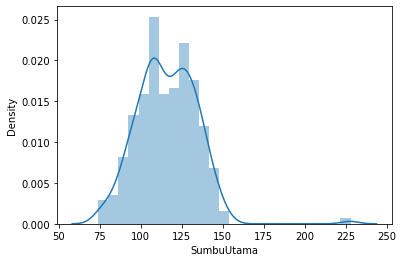

In [46]:
normality_test(gandum["SumbuUtama"])
seaborn.distplot(gandum["SumbuUtama"])

#### Hasil Tes Distribusi Normal "SumbuKecil"
Penjelasan: Dapat terlihat pada hasil plot di bawah, distribusi kolom Sumbu Kecil terlihat seperti bell curve dan hasil dari normality test menunjukkan bahwa data terdistribusi secara normal, sehingga dapat disimpulkan bahwa data dalam kolom Sumbu Kecil terdistribusi secara normal

p-valuenya adalah 0.4234558641910553 > 0.05. Maka dari itu, sample berdistribusi normal


<AxesSubplot:xlabel='SumbuKecil', ylabel='Density'>

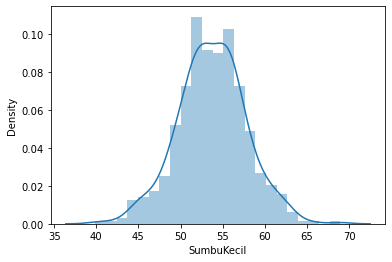

In [47]:
normality_test(gandum["SumbuKecil"])
seaborn.distplot(gandum["SumbuKecil"])

#### Hasil Tes Distribusi Normal "Keunikan"
Penjelasan: Dapat terlihat dengan jelas pada hasil plot di bawah, bahwa kolom Keunikan tidak terdistribusi secara normal karena skew negatif, tidak simetris, dan tidak berbentuk secara bell curve, selain itu, hasil dari normality test menunjukkan bahwa data tidak terdistribusi secara normal, sehingga dapat disimpulkan bahwa kolom Keunikan tidak terdistribusi secara normal

p-valuenya adalah 1.3151663082081454e-22 < 0.05. Maka dari itu, sample tidak berdistribusi normal


<AxesSubplot:xlabel='Keunikan', ylabel='Density'>

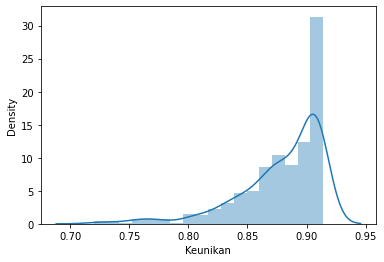

In [48]:
normality_test(gandum["Keunikan"])
seaborn.distplot(gandum["Keunikan"])

#### Hasil Tes Distribusi Normal "AreaBulatan"
Penjelasan: Dapat dilihat pada hasil plot di bawah, walaupun sekilas terlihat terdistribusi secara normal, hasil normality test mengindikasikan bahwa kolom Area Bulatan tidak terdistribusi secara normal, sehingga dapat disimpulkan bahwa kolom Area Bulatan tidak terdistribusi secara normal

p-valuenya adalah 0.0024847122840583324 < 0.05. Maka dari itu, sample tidak berdistribusi normal


<AxesSubplot:xlabel='AreaBulatan', ylabel='Density'>

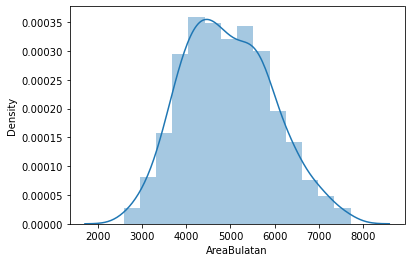

In [49]:
normality_test(gandum["AreaBulatan"])
seaborn.distplot(gandum["AreaBulatan"])

#### Hasil Tes Distribusi Normal "Diameter"
Penjelasan: Pada hasil plot di bawah, dapat dilihat bahwa kolom Diameter terdistribusi secara normal karena simetris dan berbentuk seperti bell curve, dan hasil normality test menunjukkan terdistribusi secara normal. Sehingga dapat disimpulkan bahwa kolom Diameter terdistribusi secara normal

p-valuenya adalah 0.11834503710269928 > 0.05. Maka dari itu, sample berdistribusi normal


<AxesSubplot:xlabel='Diameter', ylabel='Density'>

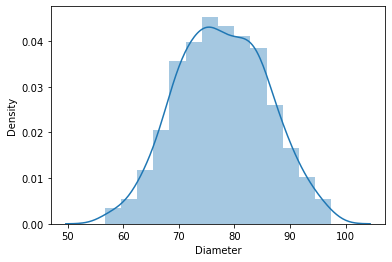

In [50]:
normality_test(gandum["Diameter"])
seaborn.distplot(gandum["Diameter"])

#### Hasil Tes Distribusi Normal "KadarAir"
Penjelasan: Pada hasil plot di bawah dapat dilihat bahwa data tidak terdistribusi secara normal karena tidak simetris dan tidak berbentuk seperti bell curve, selain itu, hasil dari normality test menunjukkan bahwa data tidak terdistribusi secara normal, sehingga dapat disimpulkan bahwa kolom Kadar Air tidak terdistribusi secara normal

p-valuenya adalah 1.959499836695633e-12 < 0.05. Maka dari itu, sample tidak berdistribusi normal


<AxesSubplot:xlabel='KadarAir', ylabel='Density'>

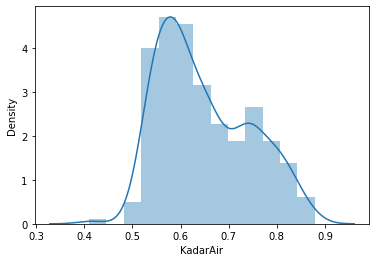

In [51]:
normality_test(gandum["KadarAir"])
seaborn.distplot(gandum["KadarAir"])

#### Hasil Tes Distribusi Normal "Keliling"
Penjelasan: Dapat terlihat pada hasil plot di bawah, tabel Keliling tidak terdistribusi secara normal karena terlihat skew positif dan tidak simetris serta tidak berbentuk seperti bell curve. Hasil dari normality test juga mengindikasikan bahwa data tidak terdistribusi secara normal, sehingga dapat disimpulkan bahwa kolom Keliling tidak terdistribusi secara normal

p-valuenya adalah 9.728394090302572e-09 < 0.05. Maka dari itu, sample tidak berdistribusi normal


<AxesSubplot:xlabel='Keliling', ylabel='Density'>

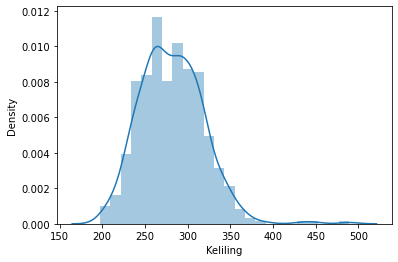

In [52]:
normality_test(gandum["Keliling"])
seaborn.distplot(gandum["Keliling"])

#### Hasil Tes Distribusi Normal "Bulatan"
Penjelasan: Dapat terlihat pada hasil plot di bawah, tabel tidak terdistribusi normal karena terlihat skew negatif, tidak simetris, dan tidak berbentuk seperti bell curve. Selain itu, hasil normality test menunjukkan bahwa data tidak terdistribusi secara normal, sehingga dapat disimpulkan bahwa kolom Bulatan tidak terdistribusi secara normal

p-valuenya adalah 6.899158691421287e-26 < 0.05. Maka dari itu, sample tidak berdistribusi normal


<AxesSubplot:xlabel='Bulatan', ylabel='Density'>

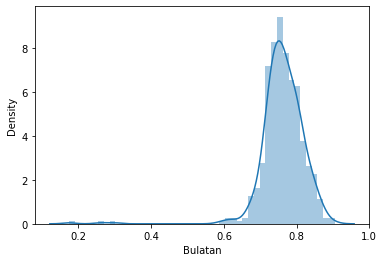

In [53]:
normality_test(gandum["Bulatan"])
seaborn.distplot(gandum["Bulatan"])

#### Hasil Tes Distribusi Normal "Ransum"
Penjelasan: Dapat terlihat pada hasil plot di bawah, data tidak berbentuk seperti bell curve dan hasil dari normality test menunjukkan bahwa data tidak terdistribusi secara normal, sehingga dapat disimpulkan bahwa Ransum tidak terdistribusi secara normal

p-valuenya adalah 6.245541108888591e-15 < 0.05. Maka dari itu, sample tidak berdistribusi normal


<AxesSubplot:xlabel='Ransum', ylabel='Density'>

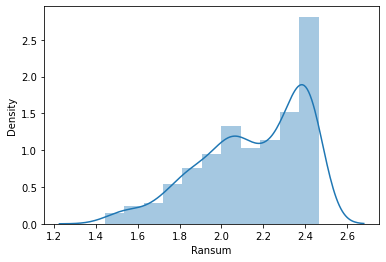

In [54]:
normality_test(gandum["Ransum"])
seaborn.distplot(gandum["Ransum"])

## Enam Langkah Testing

1. Tentukan Hipotesis nol

2. Pilih Hipotesis Alternatif

3. Tentukan tingkat signifikan alpha

4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis

5. Hitung nilai uji statistik dari data sample. Hitung p-value sesuai dengan uji statistik yang digunakan

6. Ambil keputusan dengan TOLAK Hipotesis nol jika nilai uji terletak di daerah kritis atau dengan tes signifikan, TOLAK Hipotesis nol jika p-value lebih kecil dibanding tingkat signifikansi alpha yang diinginkan

### Soal4

4. Melakukan test hipotesis 1 sampel, dengan menuliskan 6 langkah testing dan menampilkan juga boxplotnya untuk kolom/bagian yang bersesuaian.

In [55]:
# Fungsi test hipotesis 1 sampel
def one_sample(column, H0, alt): # alt = 'two-sided', 'less', atau 'greater'
    print("Mean\t\t:", column.mean())
    r = ttest_1samp(column, H0, alternative = alt)
    print("Tes statistik\t:", r.statistic)
    print("p-value\t\t:", r.pvalue)
    if r.pvalue > 0.05:
        print("Hipotesis nol diterima")
    else:
        print("Hipotesis nol ditolak")
    return

    a. Nilai rata-rata Daerah di atas 4700?
        1. H0: µ = 4700
        2. H1: µ > 4700
        3. alpha = 0.05
        4. Tes statistik = mean - H0 / (standar deviasi/sqrt(jumlah data))
        5. Hitung nilai uji statistik, Mencari p-value
        6. Keputusan

In [56]:
# 4.a.4, 4.a.5, 4.a.6
H0 = 4700
one_sample(gandum["Daerah"], H0, 'greater')

Mean		: 4801.246
Tes statistik	: 2.295153824252517
p-value		: 0.011069185447613176
Hipotesis nol ditolak


<AxesSubplot:>

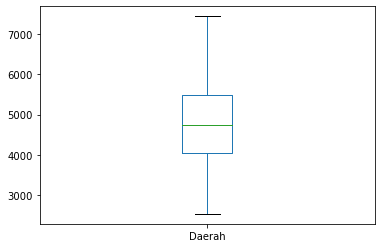

In [57]:
# Box plot Daerah
gandum["Daerah"].plot(kind = 'box')

<AxesSubplot:xlabel='Daerah', ylabel='Density'>

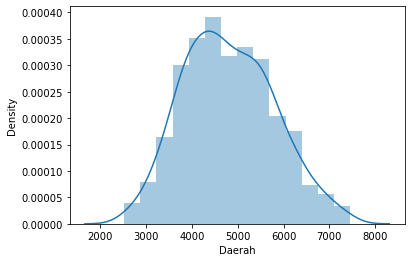

In [58]:
# Distribution plot Daerah
seaborn.distplot(gandum["Daerah"])

    b. Nilai Rata-rata Sumbu Utama tidak sama dengan 116?
        1. H0: µ = 116
        2. H1: µ != 116
        3. alpha = 0.05
        4. Tes statistik = mean - H0 / (standar deviasi/sqrt(jumlah data))
        5. Hitung nilai uji statistik, Mencari p-value
        6. Keputusan

In [59]:
# 4.b.4, 4.b.5, 4.b.6
H0 = 116
one_sample(gandum["SumbuUtama"], H0, 'two-sided')

Mean		: 116.04517136778003
Tes statistik	: 0.05524712326730106
p-value		: 0.9559636999411129
Hipotesis nol diterima


<AxesSubplot:>

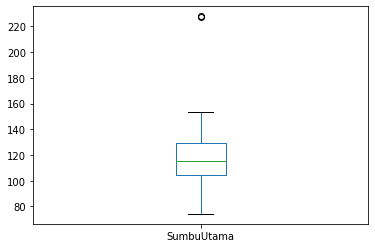

In [60]:
# Box plot Sumbu Utama
gandum["SumbuUtama"].plot(kind = 'box')

<AxesSubplot:xlabel='SumbuUtama', ylabel='Density'>

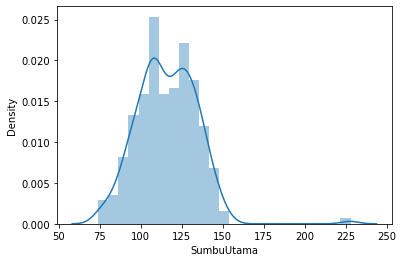

In [61]:
# Distribution plot Sumbu Utama
seaborn.distplot(gandum["SumbuUtama"])

    c. Nilai Rata-rata 20 baris pertama kolom Sumbu Kecil bukan 50?
        1. H0: µ = 50
        2. H1: µ != 50
        3. alpha = 0.05
        4. Tes statistik = mean - H0 / (standar deviasi/sqrt(jumlah data))
        5. Hitung nilai uji statistik, Mencari p-value
        6. Keputusan

In [62]:
# 4.c.4, 4.c.5, 4.c.6
H0 = 50
first_twenty = gandum["SumbuUtama"].head(20) # 20 baris pertama kolom Sumbu Kecil
one_sample(first_twenty, H0, 'two-sided')

Mean		: 131.27704224999997
Tes statistik	: 10.78107877822708
p-value		: 1.5463920539087379e-09
Hipotesis nol ditolak


<AxesSubplot:>

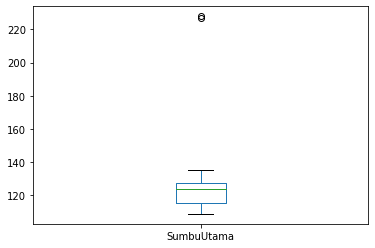

In [63]:
# Box plot 20 baris pertama kolom Sumbu Kecil
first_twenty.plot(kind = 'box')

<AxesSubplot:xlabel='SumbuUtama', ylabel='Density'>

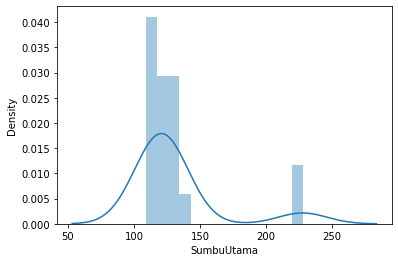

In [64]:
# Distribution plot 20 baris pertama Sumbu Kecil
seaborn.distplot(first_twenty)

In [65]:
# Fungsi tes 1 sample dengan proporsi
def one_sample_proportion(success, n, val, alt):
    zstat, pvalue = proportions_ztest(count = success, nobs = n, value = val, \
                                      alternative = alt, prop_var = H0)
    print("Test statistik\t:", zstat)
    print("p-value\t\t:", pvalue)
    if pvalue > 0.05:
        print("Hipotesis nol diterima")
    else:
        print("Hipotesis nol ditolak")

    d. Proporsi nilai Diameter yang lebih dari 85, adalah tidak sama dengan 15% ?
        1. H0: p = 0.15
        2. H1: p != 0.15
        3. alpha = 0.05
        4. Tes statistik = (alternative-probability - H0) / sqrt(H0 * (1 - H0) / n)
        5. Hitung nilai uji statistik, Mencari p-value
        6. Keputusan

In [66]:

# 4.d.4, 4.d.5, 4.d.6
H0 = 0.15
greater = gandum[gandum["Diameter"] > 85]["Diameter"].count() # Diameter > 85
count = gandum["Diameter"].count()
one_sample_proportion(greater, count, H0, 'two-sided')

Test statistik	: 2.755386880774658
p-value		: 0.005862277168409654
Hipotesis nol ditolak


<AxesSubplot:>

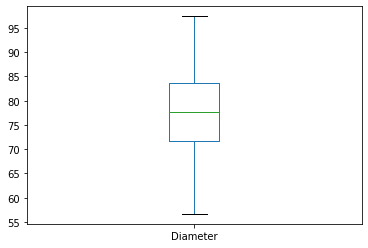

In [67]:
# Box plot Diameter
gandum["Diameter"].plot(kind = 'box')

<AxesSubplot:xlabel='Diameter', ylabel='Density'>

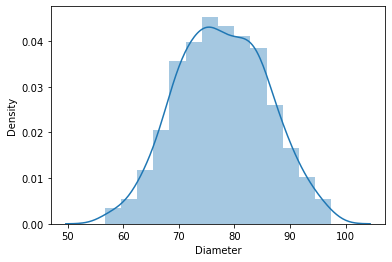

In [68]:
# Distribution plot Diameter
seaborn.distplot(gandum["Diameter"])

    e. Proporsi nilai Keliling yang kurang dari 100, adalah kurang dari 5% ?
        1. H0: p = 0.05
        2. H1: p < 0.05
        3. alpha = 0.05
        4. Tes statistik = (alternative-probability - H0) / sqrt(H0 * (1 - H0) / n)
        5. Hitung nilai uji statistik, Mencari p-value
        6. Keputusan

In [69]:
# 4.e.4, 4.e.5, 4.e.6
H0 = 0.05
less = gandum[gandum["Keliling"] < 100]["Keliling"].count()
count = gandum["Keliling"].count()
one_sample_proportion(less, count, H0, 'smaller')

Test statistik	: -5.129891760425771
p-value		: 1.4495441414387716e-07
Hipotesis nol ditolak


<AxesSubplot:>

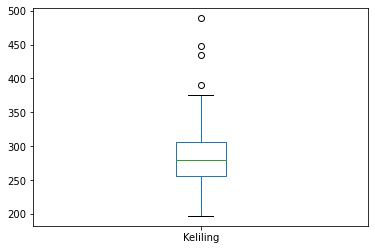

In [70]:
# Box plot Keliling
gandum["Keliling"].plot(kind = 'box')

<AxesSubplot:xlabel='Keliling', ylabel='Density'>

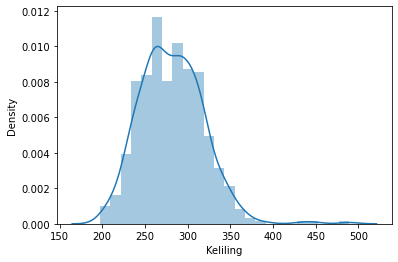

In [71]:
# Distribution plot Keliling
seaborn.distplot(gandum["Keliling"])

### Soal5

5. Melakukan test hipotesis 2 sampel, dengan menuliskan 6 langkah testing dan menampilkan juga boxplotnya untuk kolom/bagian yang bersesuaian.

In [72]:
# Fungsi test hipotesis 2 sampel
def two_samples(one, two, var, alt): # var = expression kesamaan variance
    r = ttest_ind(awal, akhir, equal_var = var, alternative = alt)
    print("Test statistik\t:", r.statistic)
    print("p-value\t\t:", r.pvalue)
    if r.pvalue > 0.05:
        print("Hipotesis nol diterima")
    else:
        print("Hipotesis nol ditolak")

    a. Data kolom AreaBulatan dibagi 2 sama rata: bagian awal dan bagian akhir kolom. 
       Benarkah rata-rata kedua bagian tersebut sama?
        1. H0: µ1 = µ2
        2. H1: µ1 != µ2
        3. alpha = 0.05
        4. Tes statistik = ((µ1 - µ2) - d0) / sqrt(var1/n1 + var2/n2)
        5. Hitung nilai uji statistik, Mencari p-value
        6. Keputusan

In [73]:
# 5.a.4, 5.a.5, 5.a.6
# Bagian awal
awal = gandum["AreaBulatan"].head(int(gandum["AreaBulatan"].count() / 2))
# Bagian akhir
akhir = gandum["AreaBulatan"].tail(int(gandum["AreaBulatan"].count() / 2))
print("Mean awal\t:", awal.mean())
print("Mean akhir\t:", akhir.mean())
two_samples(awal, akhir, awal.var() == akhir.var(), 'two-sided')

Mean awal	: 5549.804
Mean akhir	: 4324.292
Test statistik	: 17.013036648485464
p-value		: 2.941627764479393e-51
Hipotesis nol ditolak


<AxesSubplot:xlabel='variable', ylabel='value'>

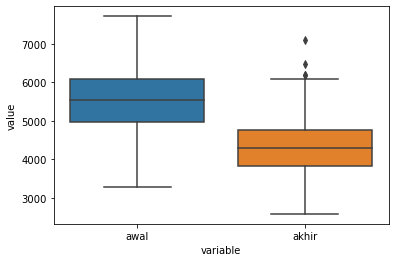

In [74]:
# Boxplot 5.a
toshow = pandas.DataFrame(columns = ["awal", "akhir"])
toshow["awal"] = awal
toshow["akhir"] = akhir.reset_index(drop = True)
seaborn.boxplot(x = "variable", y = "value", data = pandas.melt(toshow))

    b. Data kolom Kadar Air dibagi 2 sama rata: bagian awal dan bagian akhir kolom. 
       Benarkah rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.2?
        1. H0: µ1 - µ2 = 0.2
        2. H1: µ1 - µ2 != 0.2
        3. alpha = 0.05
        4. Tes statistik = ((µ1 - µ2) - d0) / sqrt(var1/n1 + var2/n2)
        5. Hitung nilai uji statistik, bandingkan dengan daerah kritis signifikansi
        6. Keputusan

In [75]:
# Fungsi menghitung z
def calc_z(one, two, d0):
    numerator = one.mean() - two.mean() - d0
    denumerator = numpy.sqrt(one.var() / one.count() + two.var() / two.count())
    return numerator / denumerator

In [76]:
# 5.b.4, 5.b.5, 5.b.6
# Bagian awal Kadar Air
alpha = 0.05
awal = gandum["KadarAir"].head(int(gandum["KadarAir"].count() / 2))
# Bagian akhir Kadar Air
akhir = gandum["KadarAir"].tail(int(gandum["KadarAir"].count() / 2))
z = calc_z(awal, akhir, 0.2)
z_alpha = norm.ppf(1 - alpha / 2)
print("Z\t:", z)
print("Z alpha\t:", z_alpha)
if -z_alpha < z < z_alpha:
    print("Hipotesis nol diterima")
else: # z < -z_alpha || z > z_alpha
    print("Hipotesis nol ditolak")

Z	: -26.903444249744968
Z alpha	: 1.959963984540054
Hipotesis nol ditolak


<AxesSubplot:xlabel='variable', ylabel='value'>

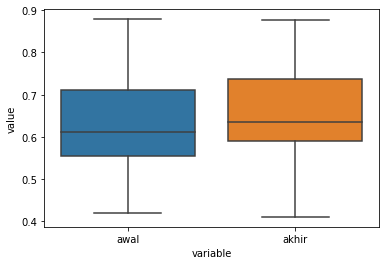

In [77]:
# Boxplot 5.b
toshow = pandas.DataFrame(columns = ["awal", "akhir"])
toshow["awal"] = awal
toshow["akhir"] = akhir.reset_index(drop = True)
seaborn.boxplot(x = "variable", y = "value", data = pandas.melt(toshow))

    c. Rata-rata 20 baris pertama kolom Bulatan sama dengan 20 baris terakhirnya?
        1. H0: µ1 = µ2
        2. H1: µ1 != µ2
        3. alpha = 0.05
        4. Tes statistik = ((µ1 - µ2) - d0) / sqrt(var1/n1 + var2/n2)
        5. Hitung nilai uji statistik, Mencari p-value
        6. Keputusan

In [78]:
# 5.c.4, 5.c.5, 5.c.6
# 20 pertama
first_twenty = gandum["Bulatan"].head(20)
# 20 akhir
last_twenty = gandum["Bulatan"].tail(20)
print("Mean 20 pertama\t:", first_twenty.mean())
print("Mean 20 akhir\t:", last_twenty.mean())
two_samples(first_twenty, last_twenty, \
            first_twenty.var() == last_twenty.var(), 'two-sided')

Mean 20 pertama	: 0.73753535525
Mean 20 akhir	: 0.767322437
Test statistik	: -3.0164987047810152
p-value		: 0.0026879938180381017
Hipotesis nol ditolak


<AxesSubplot:xlabel='variable', ylabel='value'>

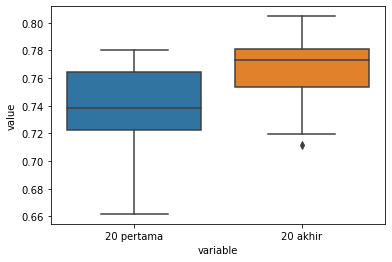

In [79]:
# Boxplot 5.c
toshow = pandas.DataFrame(columns = ["20 pertama", "20 akhir"])
toshow["20 pertama"] = first_twenty
toshow["20 akhir"] = last_twenty.reset_index(drop = True)
seaborn.boxplot(x = "variable", y = "value", data = pandas.melt(toshow))

    d. Proporsi nilai bagian awal Ransum yang lebih dari 2, adalah lebih besar daripada, proporsi nilai yang sama di bagian akhir Ransum?
        1. H0: p1 = p2
        2. H1: p1 > p2
        3. alpha = 0.05
        4. Tes statistik = (p1 - p2) / sqrt(p * q * (1 / n1 + 1 / n2))
        5. Hitung nilai uji statistik, bandingkan dengan daerah kritis signifikansi
        6. Keputusan

In [80]:
# 5.d.4, 5.d.5, 5.d.6
alpha = 0.05 # signifikansi alpha
def calc_ptopi(x, nobs): # kalkulasi p topi
    return x / nobs

# Bagian awal Ransum
awal = gandum.head(int(gandum["Ransum"].count() / 2))
cawal = awal["Ransum"].count() # count total awal
awal = awal[awal["Ransum"] > 2]["Ransum"] # awal > 2

# Bagian akhir ransum
akhir = gandum.tail(int(gandum["Ransum"].count() / 2))
cakhir = akhir["Ransum"].count() # count total akhir
akhir = akhir[akhir["Ransum"] > 2]["Ransum"] # akhir > 2

pTopi1 = calc_ptopi(awal.count(), cawal)
pTopi2 = calc_ptopi(akhir.count(), cakhir)

pTopi = (awal.count() + akhir.count()) / (cawal + cakhir)
qTopi = 1 - pTopi

Z = (pTopi1 - pTopi2) / numpy.sqrt(pTopi * qTopi * (1 / cawal + 1 / cakhir))
Zalpha = norm.ppf(1 - alpha)

print("Z\t:", Z)
print("Z alpha\t:", Zalpha)

if Z > Zalpha:
    print("Hipotesis nol ditolak")
else:
    print("Hipotesis nol diterima")

Z	: 13.397486455610238
Z alpha	: 1.6448536269514722
Hipotesis nol ditolak


<AxesSubplot:xlabel='variable', ylabel='value'>

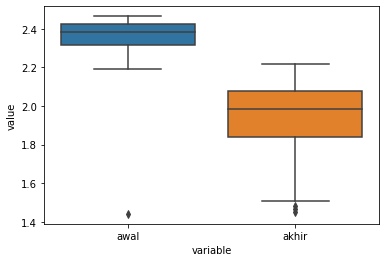

In [81]:
# Boxplot 5.d
half = int(gandum["Ransum"].count() / 2)
toshow = pandas.DataFrame(columns = ["awal", "akhir"])
showAwal = gandum["Ransum"].head(half)
showAkhir = gandum["Ransum"].tail(half)
toshow["awal"] = showAwal
toshow["akhir"] = showAkhir.reset_index(drop = True)
seaborn.boxplot(x = "variable", y = "value", data = pandas.melt(toshow))

    e. Bagian awal kolom Diameter memiliki variansi yang sama dengan bagian akhirnya?
        1. H0: σ2 1 = σ2 2 (variansi)
        2. H1: σ2 1 != σ2 2 (variansi)    
        3. alpha = 0.05
        4. Tes statistik = ((µ1 - µ2) - d0) / sqrt(var1/n1 + var2/n2)
        5. Hitung nilai uji statistik, bandingkan dengan daerah kritis signifikansi
        6. Keputusan

In [82]:
# 5.e.4, 5.e.5, 5.e.6
# Bagian Awal Diameter
awal = gandum["Diameter"].head(int(gandum["Diameter"].count() / 2))
# Bagian Akhir Diameter
akhir = gandum["Diameter"].tail(int(gandum["Diameter"].count() / 2))

f = awal.var() / akhir.var() # F tes statistik

v1 = awal.count() - 1 # v1
v2 = akhir.count() - 1 # v2

upp = scipy.stats.f.ppf(q = 0.975, dfn = v1, dfd = v2) # f0.975(v1, v2)
low = scipy.stats.f.ppf(q = 0.025, dfn = v1, dfd = v2) # f0.025(v1, v2)
SUB = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")

print("f\t:", f)
print("f0.975\t:", upp)
print("f0.025\t:", low)

if low < f < upp:
    print("Hipotesis nol diterima")
else:
    print("Hipotesis nol ditolak")

f	: 1.0838780220421884
f0.975	: 1.2827228078241388
f0.025	: 0.7795916576054985
Hipotesis nol diterima


<AxesSubplot:xlabel='variable', ylabel='value'>

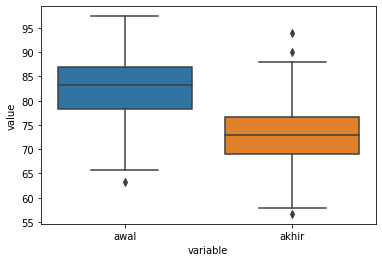

In [83]:
# Boxplot 5.e
toshow = pandas.DataFrame(columns = ["awal", "akhir"])
toshow["awal"] = awal
toshow["akhir"] = akhir.reset_index(drop = True)
seaborn.boxplot(x = "variable", y = "value", data = pandas.melt(toshow))

### Soal6

6. Test korelasi: tentukan apakah setiap kolom non-target berkorelasi dengan kolom target, dengan menggambarkan juga scatter plot nya. Gunakan correlation test.

In [84]:
# Korelasi tes
target = pandas.DataFrame(gandum["Kelas"])
daerah = pandas.DataFrame(gandum["Daerah"])
sumbu_utama = pandas.DataFrame(gandum["SumbuUtama"])
sumbu_kecil = pandas.DataFrame(gandum["SumbuKecil"])
keunikan = pandas.DataFrame(gandum["Keunikan"])
area_bulatan = pandas.DataFrame(gandum["AreaBulatan"])
diameter = pandas.DataFrame(gandum["Diameter"])
kadar_air = pandas.DataFrame(gandum["KadarAir"])
keliling = pandas.DataFrame(gandum["Keliling"])
bulatan = pandas.DataFrame(gandum["Bulatan"])
ransum = pandas.DataFrame(gandum["Ransum"])
gandum[gandum.columns[1:]].corr()["Kelas"][:]

Daerah        -0.602747
SumbuUtama    -0.713091
SumbuKecil    -0.152975
Keunikan      -0.730456
AreaBulatan   -0.607313
Diameter      -0.602536
KadarAir       0.134344
Keliling      -0.634861
Bulatan        0.545005
Ransum        -0.839904
Kelas          1.000000
Name: Kelas, dtype: float64

In [85]:
def print_correlation(name, var):
    print("Korelasi", name, "dan target (Kelas)")
    print("Koefisien korelasi\t:", var[0])
    print("p-value\t\t\t:", var[1])
    if (var[1] < 0.05):
        print("Kolom", name, "dan target (Kelas) berkorelasi")
    else:
        print("Kolom", name, "dan target (Kelas) TIDAK berkorelasi")
    print()

In [86]:
# Korelasi tes Pearson
kol_target = gandum["Kelas"]
corrDaerah = scipy.stats.pearsonr(kol_target, gandum["Daerah"])
corrSumbuUtama = scipy.stats.pearsonr(kol_target, gandum["SumbuUtama"])
corrSumbuKecil = scipy.stats.pearsonr(kol_target, gandum["SumbuKecil"])
corrKeunikan = scipy.stats.pearsonr(kol_target, gandum["Keunikan"])
corrAreaBulatan = scipy.stats.pearsonr(kol_target, gandum["AreaBulatan"])
corrDiameter = scipy.stats.pearsonr(kol_target, gandum["Diameter"])
corrKadarAir = scipy.stats.pearsonr(kol_target, gandum["KadarAir"])
corrKeliling = scipy.stats.pearsonr(kol_target, gandum["Keliling"])
corrBulatan = scipy.stats.pearsonr(kol_target, gandum["Bulatan"])
corrRansum = scipy.stats.pearsonr(kol_target, gandum["Ransum"])
print_correlation("Daerah", corrDaerah)
print_correlation("Sumbu Utama", corrSumbuUtama)
print_correlation("Sumbu Kecil", corrSumbuKecil)
print_correlation("Keunikan", corrKeunikan)
print_correlation("Area Bulatan", corrAreaBulatan)
print_correlation("Diameter", corrDiameter)
print_correlation("Kadar Air", corrKadarAir)
print_correlation("Keliling", corrKeliling)
print_correlation("Bulatan", corrBulatan)
print_correlation("Ransum", corrRansum)

Korelasi Daerah dan target (Kelas)
Koefisien korelasi	: -0.6027466517416677
p-value			: 8.925696449471519e-51
Kolom Daerah dan target (Kelas) berkorelasi

Korelasi Sumbu Utama dan target (Kelas)
Koefisien korelasi	: -0.7130906104204615
p-value			: 7.742407802536857e-79
Kolom Sumbu Utama dan target (Kelas) berkorelasi

Korelasi Sumbu Kecil dan target (Kelas)
Koefisien korelasi	: -0.15297517335535066
p-value			: 0.0005985078116773203
Kolom Sumbu Kecil dan target (Kelas) berkorelasi

Korelasi Keunikan dan target (Kelas)
Koefisien korelasi	: -0.730456368651195
p-value			: 1.649679087551736e-84
Kolom Keunikan dan target (Kelas) berkorelasi

Korelasi Area Bulatan dan target (Kelas)
Koefisien korelasi	: -0.607312543415377
p-value			: 1.011380436294041e-51
Kolom Area Bulatan dan target (Kelas) berkorelasi

Korelasi Diameter dan target (Kelas)
Koefisien korelasi	: -0.602535689661883
p-value			: 9.862113990166241e-51
Kolom Diameter dan target (Kelas) berkorelasi

Korelasi Kadar Air dan target (K

#### Hasil Korelasi Tes

Ditentukan menggunakan aturan praktis oleh Rea dan Parker (1992), yaitu:

    0.00 < 0.10 - Negligible
    0.10 < 0.20 - Weak
    0.20 < 0.40 - Moderate
    0.40 < 0.60 - Relatively strong
    0.60 < 0.80 - Strong
    0.80 < 1.00 - Very strong

- Korelasi Daerah dengan Target : -0.602747 (Merupakan korelasi yang Strong)

- Korelasi Sumbu Utama dengan Target : -0.713091 (Merupakan korelasi yang Strong)

- Korelasi Sumbu Kecil dengan Target : -0.152975 (Merupakan korelasi yang Weak)

- Korelasi Keunikan dengan Target : -0.730456 (Merupakan korelasi yang Strong)

- Korelasi Area Bulatan dengan Target : -0.607313 (Merupakan korelasi yang Strong)

- Korelasi Diameter dengan Target : -0.602536 (Merupakan korelasi yang Strong)

- Korelasi KadarAir dengan Target : 0.134344 (Merupakan korelasi yang Weak)

- Korelasi Keliling dengan Target : -0.634861 (Merupakan korelasi yang Strong)

- Korelasi Bulatan dengan Target : 0.545005 (Merupakan korelasi yang Relatively Strong)

- Korelasi Ransum dengan Target : -0.839904 (Merupakan korelasi yang Very Strong)


##### Penjelasan
Jika (-), maka korelasi negatif yang menandakan bahwa jika satu kolom berkurang maka yang lainnya bertambah

Jika (+), maka korelasi positif yang menandakan bahwa jika saut kolom bertambah/berkurang maka kolom lainnya juga mengikuti

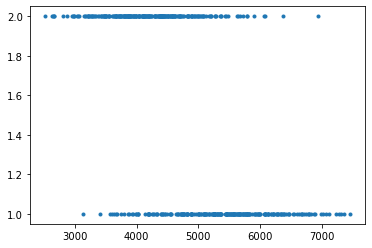

In [87]:
# Scatter plot kolom daerah dengan target (kelas)
fig, ax = matplotlib.pyplot.subplots(1, 1)
ax.plot(daerah, target, '.')

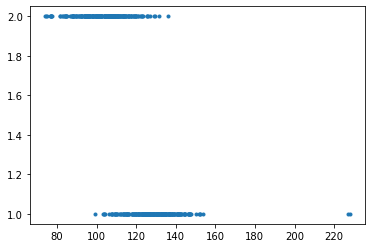

In [88]:
# Scatter plot kolom sumbu utama dengan target (kelas)
fig, ax = matplotlib.pyplot.subplots(1, 1)
ax.plot(sumbu_utama, target, '.')

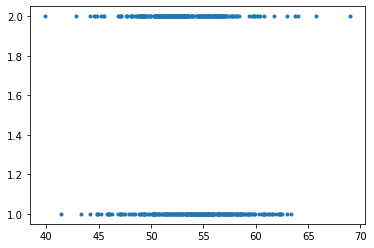

In [89]:
# Scatter plot kolom sumbu kecil dengan target (kelas)
fig, ax = matplotlib.pyplot.subplots(1, 1)
ax.plot(sumbu_kecil, target, '.')

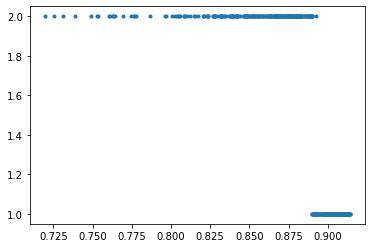

In [90]:
# Scatter plot kolom keunikan dengan target (kelas)
fig, ax = matplotlib.pyplot.subplots(1, 1)
ax.plot(keunikan, target, '.')

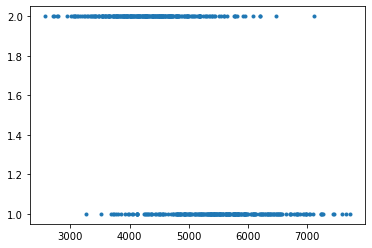

In [91]:
# Scatter plot kolom area bulatan dengan target (kelas)
fig, ax = matplotlib.pyplot.subplots(1, 1)
ax.plot(area_bulatan, target, '.')

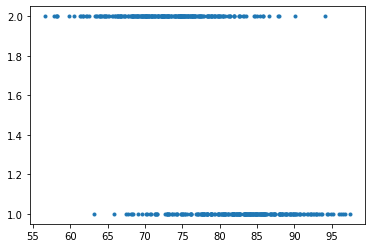

In [92]:
# Scatter plot kolom diameter dengan target (kelas)
fig, ax = matplotlib.pyplot.subplots(1, 1)
ax.plot(diameter, target, '.')

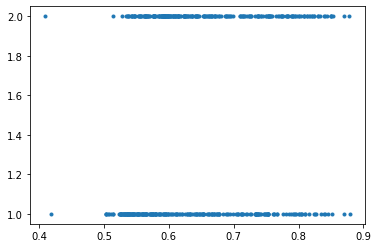

In [93]:
# Scatter plot kolom kadar air dengan target (kelas)
fig, ax = matplotlib.pyplot.subplots(1, 1)
ax.plot(kadar_air, target, '.')

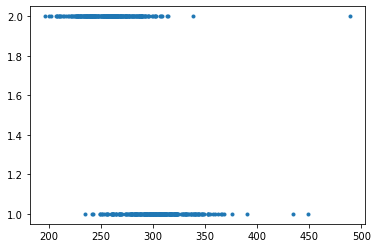

In [94]:
# Scatter plot kolom keliling dengan target (kelas)
fig, ax = matplotlib.pyplot.subplots(1, 1)
ax.plot(keliling, target, '.')

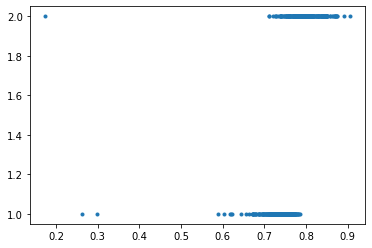

In [95]:
# Scatter plot kolom bulatan dengan target (kelas)
fig, ax = matplotlib.pyplot.subplots(1, 1)
ax.plot(bulatan, target, '.')

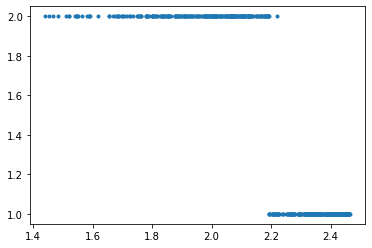

In [96]:
# Scatter plot kolom ransum dengan target (kelas)
fig, ax = matplotlib.pyplot.subplots(1, 1)
ax.plot(ransum, target, '.')